KEYWORD EXTRACTION

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt') 

from rake_nltk import Rake
rake_nltk_var = Rake()
text = """frog and dog are playing"""
rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print(keyword_extracted)

['playing', 'frog', 'dog']


PARTS OF SPEECH TAGGING

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

tokenized = word_tokenize(text)

tagged = nltk.pos_tag(tokenized)
print(tagged)

[('frog', 'NN'), ('and', 'CC'), ('dog', 'NN'), ('are', 'VBP'), ('playing', 'VBG')]


SENTIMENT ANALYSIS

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def retSetiment(text1):
    analyzer = SentimentIntensityAnalyzer()
    user_input = text1
    sentiment_scores = analyzer.polarity_scores(user_input)

    if sentiment_scores['compound'] >= 0.05:
        sentiment = "positive"
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = "negative"
    else:
        sentiment = "neutral"

    print(f"Sentiment: {sentiment}")
    return sentiment

ADDING SUBJECT DESCRIPTORS ( ENHANCERS )

In [14]:
import json
import re
from sentence_transformers import SentenceTransformer, util

def appendAdj(extNoun):
    extNoun=extNoun.lower()
    animals_adj = open("./data.json")
    ani_json = json.load(animals_adj)
    name_adj_dict = {}
    ani_json = ani_json['animals']
    sentSentiment = retSetiment(text)
    currAdj = []
    for i in ani_json:
        if(i['name'] == extNoun):
            for j in  range(len(i['adjectives'])):
                if(i['adjectives'][j]["type"] == sentSentiment):
                    currAdj.append(i['adjectives'][j]["value"])
    # print("current Adj : " , currAdj)
    name_adj_dict[extNoun] = currAdj
   
    return currAdj
    
    
    
allAdj = {}
allText = []

k=0

for i,j in (tagged):
    if(j=='NN'):
        allAdj[i] = appendAdj(i)
# for i in allAdj:
#     print(i," ",allAdj[i])
allText.append([])
allText[0]=[text]
length=1
for k in allAdj:
    allText.append([])
    if(allAdj[k] == []):
        continue
    for v1 in allAdj[k]:
        v1 += " " + k
        for m in allText[length-1]:
            # print(v1,end = "\n")
            allText[length].append(re.sub(k,v1,m))
            # print(allText[length])
    length+=1
for i in allText[length-1]:
    print(i+"\n")

Sentiment: positive
Sentiment: positive
colorful frog and cute dog are playing

vibrant frog and cute dog dog are playing

striking frog and cute dog dog dog are playing

tropical frog and cute dog dog dog dog are playing

colorful frog and happy dog are playing

vibrant frog and happy dog dog are playing

striking frog and happy dog dog dog are playing

tropical frog and happy dog dog dog dog are playing

colorful frog and active dog are playing

vibrant frog and active dog dog are playing

striking frog and active dog dog dog are playing

tropical frog and active dog dog dog dog are playing

colorful frog and loyal dog are playing

vibrant frog and loyal dog dog are playing

striking frog and loyal dog dog dog are playing

tropical frog and loyal dog dog dog dog are playing

colorful frog and friendly dog are playing

vibrant frog and friendly dog dog are playing

striking frog and friendly dog dog dog are playing

tropical frog and friendly dog dog dog dog are playing

colorful frog

HABITAT MAPPING AND EMBEDDING

In [70]:
import json
import joblib

fdata = open('./data.json')
fdata = json.load(fdata)
fdata = fdata['animals']

def checkAndReturnHabitat(extNoun):
    for i in fdata:
        if(i['name'] == extNoun):
            # print(i['habitats'])
            return i['habitats']
    return []

def isHabitat(extNoun):
    model = joblib.load('habitatModel.pkl')
    vectorizer = joblib.load('vectorModel.pkl')

    user_input = extNoun

    user_input_preprocessed = user_input

    user_input_vec = vectorizer.transform([user_input_preprocessed])

    prediction = model.predict(user_input_vec)
    if prediction[0] == 1:
        return True
    return False


#habitat inclusion
currAllText = allText[length-1]
newAllText = []
setHabitats = []

flag = True
for i,j in (tagged):
    if (j == 'NN'):
        if(isHabitat(i) == False):
            flag = False
        else:
            flag = True
            break

#if there is no habitat found in the sentence
if flag == False:
    for i,j in (tagged):
        if ((j == 'NN') and (isHabitat(i) == False)): #dog
            setHabitats = checkAndReturnHabitat(i)
            if(setHabitats == []):
                continue
            for l in currAllText:
                for k in setHabitats:
                    temp = l
                    temp += ", in the " + k
                    newAllText.append(temp)

else:
    newAllText = currAllText
for i in newAllText:
    print(i,end = "\n")

colorful frog and cute dog are playing in the forest, in the rainforests
colorful frog and cute dog are playing in the forest, in the jungles
colorful frog and cute dog are playing in the forest, in the tropical forests
vibrant frog and cute dog are playing in the forest, in the rainforests
vibrant frog and cute dog are playing in the forest, in the jungles
vibrant frog and cute dog are playing in the forest, in the tropical forests
striking frog and cute dog are playing in the forest, in the rainforests
striking frog and cute dog are playing in the forest, in the jungles
striking frog and cute dog are playing in the forest, in the tropical forests
tropical frog and cute dog are playing in the forest, in the rainforests
tropical frog and cute dog are playing in the forest, in the jungles
tropical frog and cute dog are playing in the forest, in the tropical forests
colorful frog and active dog are playing in the forest, in the rainforests
colorful frog and active dog are playing in the 

FINDING COSINE SIMILARITY

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


def cosineTop10(allText1):
    maxDict1 = {}
    top10Sentences = []
    for i in allText1:
        sentence1 = i
        sentence2 = text
        vectorizer = CountVectorizer().fit_transform([sentence1, sentence2])
        cosine_sim = cosine_similarity(vectorizer)
        # vectors1 = model.encode(col1, convert_to_tensor=True)
        # vectors2 = model.encode(col2, convert_to_tensor=True)
        # cosine_scores = util.cos_sim(vectors1, vectors2)
        if cosine_sim[0][1] >=0.5:
            maxDict1[i] = cosine_sim[0][1]
    l1 = 10
    ind1 = 0
    for k, v in sorted(maxDict1.items(), key=lambda item: item[1],reverse=True):
        if(ind1 >= l1 or ind1 >= len(maxDict1)):
            break
        ind1+=1
        top10Sentences.append(k)
    return top10Sentences 
topSentences = cosineTop10(newAllText)
for i in topSentences:
    print(i,end = "\n")
    

KNOWLEDGE GRAPH GENERATION - BASIC GoT

In [19]:
#Algorithm implementation
import json
class Node:
    def __init__(self,val,adj):
        self.val = val #string
        self.adj = adj #[]
    def getVal(self):
        return self.val

class GoT:
    def __init__(self,arr): # arr contains nsubj, dobj
        
        self.children = []
    def createGraph(self):
        for i in self.data_json:
            n = Node(i["name"])
            self.children.append(Node("adjectives"))
            self.children.append(Node("habitats"))
                    
                

got = GoT(["Tiger","lion"])
got.createGraph()

In [36]:
import json
class Node:
    name = ""
    node_type = ""
    children = []
    def __init__(self, name, node_type):
        self.name = name
        self.node_type = node_type
        self.children = []
    def add_child(self, child):
        self.children.append(child)
    def __str__(self) -> str:
        return f"{self.name} - ({self.node_type})"
   
class Graph:
    def __init__(self):
        self.nodes = []

    def add_node(self, node):
        self.nodes.append(node)

    def add_edge(self, parent, child):
        parent.add_child(child)

    def get_children(self, node):
        return node.children
    def findNode(self,animalName):
        for i in self.nodes:
            if(i.node_type == 'animal' and i.name == animalName):
                temp =  self.get_children(i)
                return temp
        return []
# Create a graph
graph = Graph()
data = open('./data.json')

data_json = json.load(data)

data_json = data_json['animals']

root = Node("animal", "root")
graph.add_node(root)
for i in range(len(data_json)):
    n1 = Node(data_json[i]['name'],"animal")
    graph.add_node(n1)
    for adj in data_json[i]["adjectives"]:
        adjective_node = Node(adj, "adjective")
        graph.add_node(adjective_node)
        graph.add_edge(n1, adjective_node)

    for habitat in data_json[i]["habitats"]:
        habitat_node = Node(habitat, "habitat")
        graph.add_node(habitat_node)
        graph.add_edge(n1, habitat_node)

testAnimal = "frog"
cdren = graph.findNode(testAnimal)
if(cdren != []):
    for i in cdren:
        print(i)
else:
    print("Not Found")

{'value': 'colorful', 'type': 'positive'} - (adjective)
{'value': 'poisonous', 'type': 'negative'} - (adjective)
{'value': 'tiny', 'type': 'negative'} - (adjective)
{'value': 'vibrant', 'type': 'positive'} - (adjective)
{'value': 'striking', 'type': 'positive'} - (adjective)
{'value': 'tropical', 'type': 'positive'} - (adjective)
rainforests - (habitat)
jungles - (habitat)
tropical forests - (habitat)
garden - (habitat)


In [50]:
sent = retSetiment(text)
allGraphAdj = {}
for n,j in tagged:
    if(j == 'NN'):
        cdren = graph.findNode(n)
        if(cdren != []):
            allGraphAdj[n] = []
            for i in cdren:
                if(i.node_type == 'adjective'):
                    if(i.name['type'] == sent):
                        allGraphAdj[n].append(i.name['value'])
                        # print(i.name['type'], " ",type(i.name))
print(allGraphAdj)


allText = []
allText.append([])
allText[0]=[text]
length=1
for k in allGraphAdj:
    allText.append([])
    if(allGraphAdj[k] == []):
        continue
    for v1 in allGraphAdj[k]:
        v1 += " " + k
        for m in allText[length-1]:
            allText[length].append(re.sub(k,v1,m))
    length+=1
for i in allText[length-1]:
    print(i+"\n")


Sentiment: positive
{'frog': ['colorful', 'vibrant', 'striking', 'tropical'], 'dog': ['cute', 'happy', 'active']}
colorful frog and cute dog are playing

vibrant frog and cute dog are playing

striking frog and cute dog are playing

tropical frog and cute dog are playing

colorful frog and happy dog are playing

vibrant frog and happy dog are playing

striking frog and happy dog are playing

tropical frog and happy dog are playing

colorful frog and active dog are playing

vibrant frog and active dog are playing

striking frog and active dog are playing

tropical frog and active dog are playing



In [37]:
from HabitatPred import isHabitat
allHabitat = {}
questions = ["Where is " + allnouns[0] +"?"]
for i,j in tagged:
    if(j == 'NN'):
        if isHabitat(text, questions) == False:
            cdren = graph.findNode(i)
            if(cdren != []):
                tempHab = []
                for i in cdren:
                    if(i.node_type == 'habitat'):
                        if(i.name in allHabitat):
                            allHabitat[i.name] += 1
                        else:
                            allHabitat[i.name] = 1
allHabitat = sorted(allHabitat.items(), key=lambda item: item[1],reverse=True)
print(allHabitat)
for i,j in allHabitat:
    print(i,": ",j)


Some weights of the model checkpoint at deepset/bert-base-cased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at deepset/bert-base-cased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architectu

[('garden', 2), ('rainforests', 1), ('jungles', 1), ('tropical forests', 1), ('house', 1), ('street', 1)]
garden :  2
rainforests :  1
jungles :  1
tropical forests :  1
house :  1
street :  1


In [52]:
finalAllText = []
for i,j in allHabitat:
    for k in allText[length-1]:
        k += " in the " + i
        finalAllText.append(k)
for i in finalAllText:
    print(i,end = "\n")

colorful frog and cute dog are playing in the garden
vibrant frog and cute dog are playing in the garden
striking frog and cute dog are playing in the garden
tropical frog and cute dog are playing in the garden
colorful frog and happy dog are playing in the garden
vibrant frog and happy dog are playing in the garden
striking frog and happy dog are playing in the garden
tropical frog and happy dog are playing in the garden
colorful frog and active dog are playing in the garden
vibrant frog and active dog are playing in the garden
striking frog and active dog are playing in the garden
tropical frog and active dog are playing in the garden
colorful frog and cute dog are playing in the rainforests
vibrant frog and cute dog are playing in the rainforests
striking frog and cute dog are playing in the rainforests
tropical frog and cute dog are playing in the rainforests
colorful frog and happy dog are playing in the rainforests
vibrant frog and happy dog are playing in the rainforests
strikin

SYSTEM METRICS

In [82]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

prompt = "frog and dog are playing"
doc = nlp(prompt)
G = nx.Graph()

words_of_interest = []

for token in doc:
    if token.pos_ in ("NOUN"):
        words_of_interest.append(token.text)

G.add_nodes_from(words_of_interest)

for word1 in words_of_interest:
    for word2 in words_of_interest:
        if word1 != word2:
            similarity = nlp(word1).similarity(nlp(word2))
            G.add_edge(word1, word2, weight=similarity)
            
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(5, 5))
labels = {node: node for node in G.nodes()}
edge_labels = {(node1, node2): round(data["weight"], 2) for node1, node2, data in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='lightblue', font_size=12, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Relationship Graph of Words (Verbs, Nouns, Adjectives, Adverbs)")
plt.axis('off')
plt.show()


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: ERROR API key must be 40 characters long, yours was 11
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\lenovo/.netrc


Knowledge Graph for Structured Data for matched entity in user input prompt

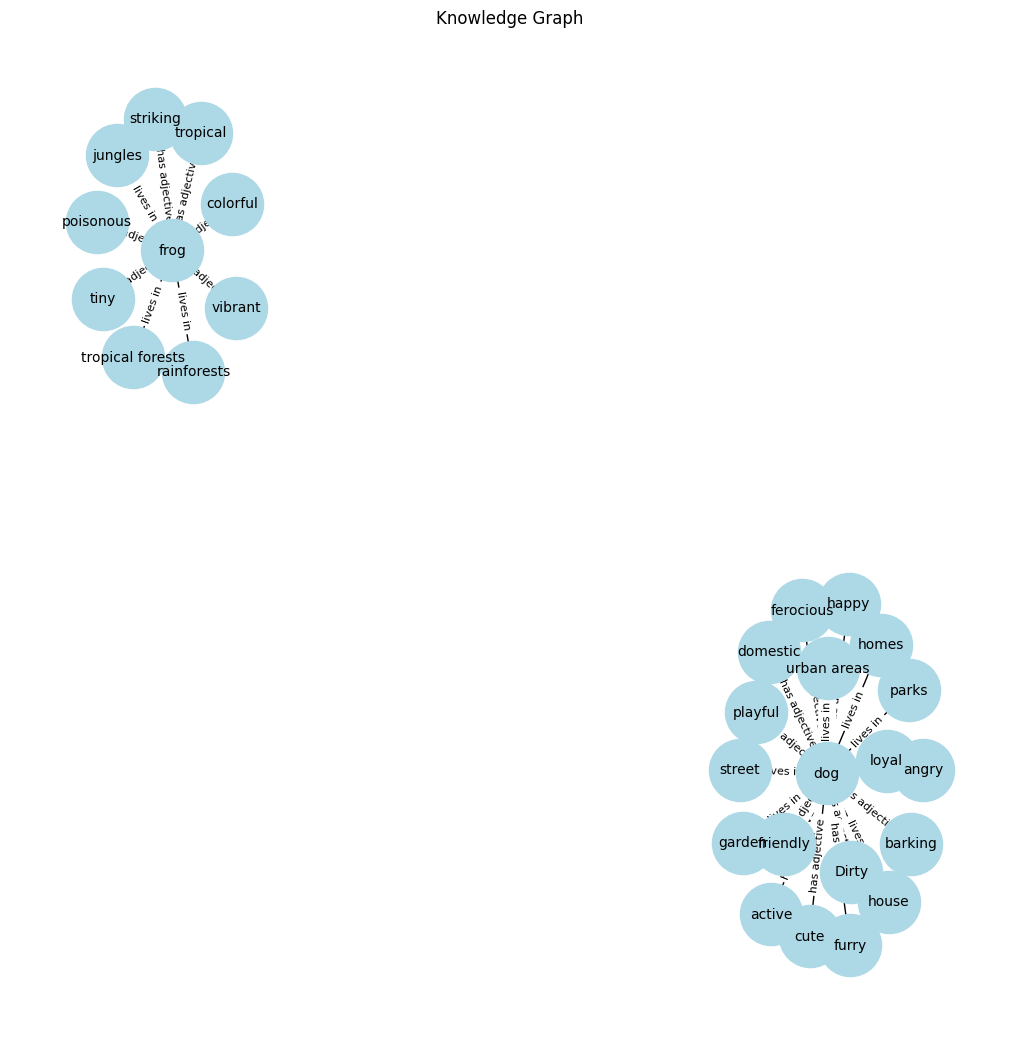

In [22]:
import spacy
import json
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

with open("data.json", "r") as json_file:
    data = json.load(json_file)

input_text = "dog and frog are playing"

doc = nlp(input_text)
keywords = [token.text.lower() for token in doc if token.pos_ in ["NOUN", "ADJ"]]

G = nx.Graph()

for animal_data in data["animals"]:
    animal_name = animal_data["name"]
    if animal_name.lower() in keywords:
        G.add_node(animal_name, label=animal_name, node_type="entity")
        for adj in animal_data["adjectives"]:
            adjective_value = adj["value"]
            G.add_node(adjective_value, label=adjective_value, node_type="adjective")
            G.add_edge(animal_name, adjective_value, relation="has adjective", edge_type="relation")
        for habitat in animal_data["habitats"]:
            G.add_node(habitat, label=habitat, node_type="habitat")
            G.add_edge(animal_name, habitat, relation="lives in", edge_type="relation")

pos = nx.spring_layout(G, seed=20)
labels = {node: G.nodes[node]["label"] for node in G.nodes}
edge_labels = {(u, v): G.edges[u, v]["relation"] for u, v in G.edges}

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, font_size=10, node_color="lightblue")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Knowledge Graph")
plt.axis("off")
plt.show()


In [ ]:
import spacy
import json
import networkx as nx
import random

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Read JSON data from a file
with open("data.json", "r") as json_file:
    data = json.load(json_file)

# Initialize a knowledge graph
G = nx.Graph()

# Iterate through each animal in the JSON data and create the knowledge graph
for animal_data in data["animals"]:
    animal_name = animal_data["name"]
    G.add_node(animal_name, label=animal_name, node_type="entity")

    for adj in animal_data["adjectives"]:
        adjective_value = adj["value"]
        adjective_type = adj["type"]
        G.add_node(adjective_value, label=adjective_value, node_type="adjective", adjective_type=adjective_type)
        G.add_edge(animal_name, adjective_value, relation="has adjective", edge_type="relation")

    for habitat in animal_data["habitats"]:
        G.add_node(habitat, label=habitat, node_type="habitat")
        G.add_edge(animal_name, habitat, relation="lives in", edge_type="relation")

keywords = []
for token in doc:
    if token.pos_ in ["NOUN", "VERB", "ADJ"]:
        keywords.append(token.text.lower())

# Find the entity (animal) mentioned in the user input
entity_mentioned = None
for keyword in keywords:
    if keyword in G.nodes:
        entity_mentioned = keyword
        break

# Generate sentences for the entity mentioned
if entity_mentioned:
    sentences = []

    # Determine the appropriate habitats based on user sentiment
    appropriate_habitats = []
    for habitat in G.neighbors(entity_mentioned):
        if G.edges[entity_mentioned, habitat]["relation"] == "lives in":
            if user_sentiment == "positive":
                appropriate_habitats.append(habitat)
            elif user_sentiment == "negative" and "negative" in G.nodes[habitat].get("adjective_type", ""):
                appropriate_habitats.append(habitat)

    # Iterate through adjectives associated with the entity
    for adj in G.neighbors(entity_mentioned):
        if G.edges[entity_mentioned, adj]["relation"] == "has adjective":
            adjective_type = G.nodes[adj].get("adjective_type", "neutral")

            # Check if the adjective is positive and matches the user's sentiment
            if adjective_type == "positive" or user_sentiment != "positive":
                # Generate sentences with appropriate habitats
                for habitat in appropriate_habitats:
                    sentence = f"{adj} {entity_mentioned} is playing in the {habitat}"
                    sentences.append(sentence)

    # Print the generated sentences
    for sentence in sentences:
        print(sentence)
else:
    print("Entity not found in the graph.")


In [28]:
import wandb
wandb.init()

C:\Users\suren\AppData\Local\Temp\ipykernel_17240\3374251134.py:23: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = nlp(word1).similarity(nlp(word2))
